In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_overseas = pd.read_csv('../DATA/overseas-trade-index-march-2019-quarter-provisional-csv.csv')
df_overseas.drop(['MAGNTUDE', 'Series_title_3', 'Series_title_4', 'Series_title_5'], inplace=True, axis=1)

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_overseas['date_col'] = df_overseas['Period'].astype(str).str.split('.')

In [4]:
df_overseas['year'] = [x[0] for x in df_overseas['date_col']]
df_overseas['year'] = pd.to_numeric(df_overseas['year'])

In [5]:
df_overseas['month'] = [x[1] for x in df_overseas['date_col']]
df_overseas['month'] = pd.to_numeric(df_overseas['month'])

In [6]:
df_overseas.drop(columns=['Period', 'date_col'], inplace=True, axis=1)

In [7]:
df_overseas.UNITS.unique()

array(['Index', 'Dollars', 'Percent', 'index'], dtype=object)

In [8]:
df_dollars = df_overseas[df_overseas['UNITS'] == "Dollars"] # Get all Dollar Statements

In [9]:
df_percent = df_overseas[df_overseas['UNITS'] == "Percent"]# Get all Percent Statements

## Get all statements that were imported and have the $ value attached

In [10]:
df_total_imports_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Imports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL IMPORTS')]

In [11]:
df_total_imp_exp_percent = df_percent[(df_percent['Series_title_2'] == 'TOTAL IMPORTS') | (df_percent['Series_title_2'] == 'TOTAL EXPORTS')]

#### Total Imports

The total imports in NZ had a steady growth from 1990 to 1996, and then there was a big bump up in 97, and the trend continued from there.

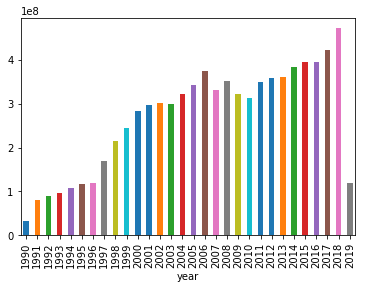

In [12]:
df_total_imports_dollars.groupby('year')['Data_value'].sum().plot.bar()

In [13]:
df_total_exports_dollars = df_dollars[(df_dollars['Series_title_2'] == 'Total Exports') | 
                                     (df_dollars['Series_title_2'] == 'TOTAL EXPORTS')]

In [14]:
df_max_type_sold = df_dollars.copy()

In [15]:
df_max_type_sold = df_max_type_sold[~(df_max_type_sold["Series_title_2"].str.contains("TOTAL")) & 
                                   ~(df_max_type_sold["Series_title_2"].str.contains("total"))]

In [16]:
df_countries_exports = df_dollars[(df_dollars["Series_title_2"].str.contains("Exports to"))]

In [17]:
# Remove outliers, get the last 95th Percentile
q = df_countries_exports["Data_value"].quantile(0.95)
df_countries_exports = df_countries_exports[df_countries_exports["Data_value"] < q]

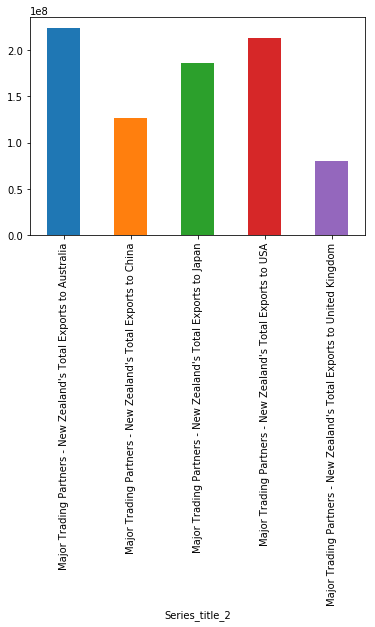

In [18]:
df_countries_exports.groupby("Series_title_2")["Data_value"].sum().plot.bar()

In [19]:
df_countries_exports_file = df_countries_exports.groupby(["year", "Series_title_2"])["Data_value"].sum()

In [20]:
count_exp = pd.DataFrame(df_countries_exports_file)
count_exp.reset_index(inplace=True)
count_exp['country'] = count_exp["Series_title_2"].str.split("to")
count_exp['country'] = count_exp['country'].str[1]
count_exp.drop("Series_title_2", axis=1, inplace=True)
count_exp.to_csv("../DATA/countries_time.csv", index=False)

In [21]:
count_exp.describe()

,year,Data_value
count,154.000000,1.540000e+02
mean,2004.097403,5.394442e+06
std,8.919956,2.989221e+06
min,1989.000000,1.242405e+05
25%,1996.250000,2.854862e+06
50%,2004.000000,5.822904e+06
75%,2012.000000,7.901803e+06
max,2019.000000,1.379705e+07


In [22]:
def get_sum(df, **kws):
    return df.groupby('year')['Data_value'].sum()

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


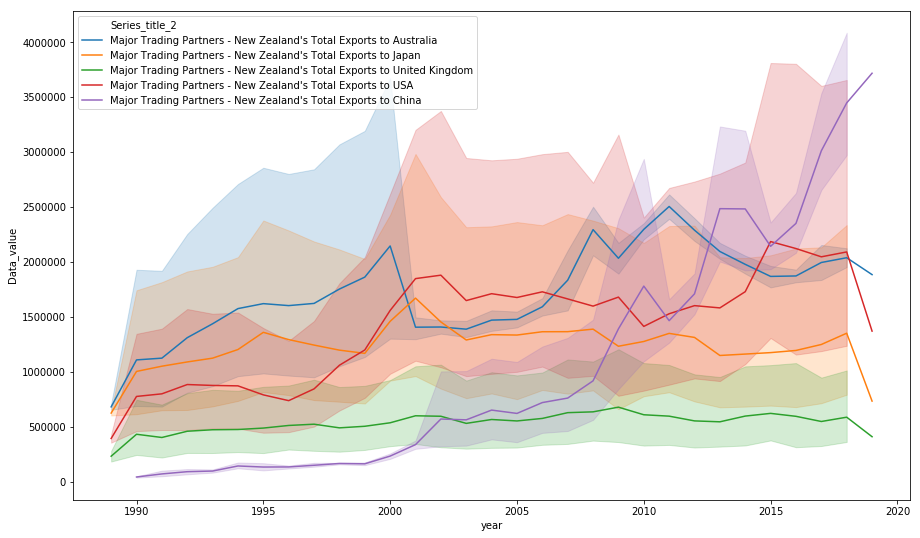

In [23]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.lineplot(x='year', y='Data_value', data=df_countries_exports, hue='Series_title_2')
plt.show()

In [24]:
df_countries_imports = df_dollars[(df_dollars["Series_title_2"].str.contains("Imports from"))]

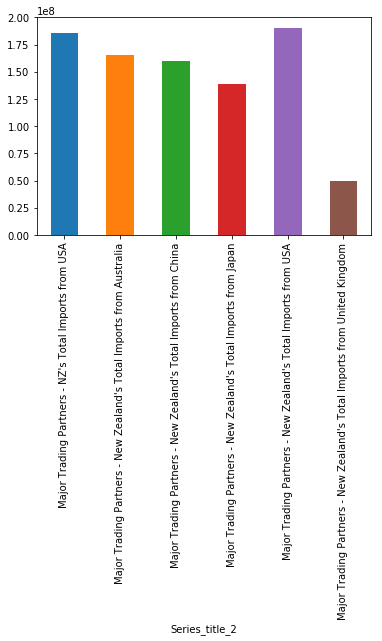

In [25]:
q = df_countries_imports["Data_value"].quantile(0.95)
df_countries_imports = df_countries_imports[df_countries_imports["Data_value"] < q]
df_countries_imports.groupby("Series_title_2")["Data_value"].sum().plot.bar()

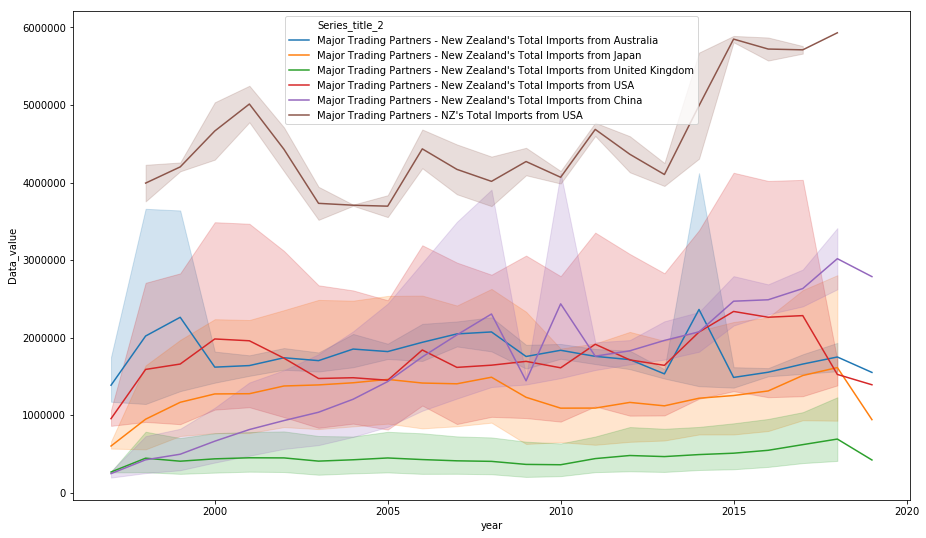

In [26]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.lineplot(x='year', y='Data_value', data=df_countries_imports, hue='Series_title_2')
plt.show()

In [27]:
df_overseas.UNITS.unique()

array(['Index', 'Dollars', 'Percent', 'index'], dtype=object)

In [28]:
df_max_type_sold = df_max_type_sold[~(df_max_type_sold["Series_title_2"].str.contains("TOTAL")) & 
                                   ~(df_max_type_sold["Series_title_2"].str.contains("total")) & 
                                   ~(df_max_type_sold["Series_title_2"].str.contains("Total"))]

* MEAT
* DAIRY
* FRUIT AND VEGETABLES
* ALCOHOL
* PRODUCTS AND MATERIALS
* MACHINERY
* FOOD & BEVERAGES 
* METALS
* PLASTICS
* CLOTHING

In [29]:
trade_types = {
    "MEAT" : ["BEEF AND VEAL", "LAMB", "LAMB, HOGGET AND MUTTON", "OTHER MEAT", 
              "CRUSTACEANS AND MOLLUSCS","FISH (LIVE, FRESH, CHILLED OR FROZEN)",
             "FISH AND FISH PREPARATION"],
    "DAIRY" : ["SKIMMED AND BUTTERMILK POWDER", "WHOLE MILK POWDER", "MILK POWDER",
              "MILK AND CREAM (LIQUID OR POWDER)", "BUTTER", "CHEESE", "DAIRY PRODUCTS","CASEIN",
              "DAIRY AND CASEIN PRODUCTS", "ALL PASTORAL AND DAIRY PRODUCTS"],
    "FOOD AND BEVERAGES" : ["VEGETABLES (FRESH OR PREPARED)", "APPLES (FRESH)", "FRUIT (FRESH OR PREPARED)",
                              "FRUIT AND VEGETABLES (FRESH OR PREPARED)", "FOOD AND BEVERAGES", "COFFEE, TEA, SPICES AND COCOA",
                           "CEREALS AND CEREAL PREPARATIONS","SUGAR AND SUGAR PREPARATIONS","Cereals and Cereal Preparations",
                           "Sugar and Sugar Preparations","Food and Beverages"],
    "ALCOHOL" : ["ALCOHOLIC BEVERAGES"],
    "PRODUCTS AND MATERIALS" : ["CRUDE ANIMAL AND VEGETABLE MATERIALS", "ANIMAL OILS AND FATS", "PETROLEUM AND PETROLEUM PRODUCTS",
                               "MINERAL FUELS, OILS AND RELATED MATERIALS","CHEMICALS AND RELATED PRODUCTS","HIDES, SKINS AND FURSKINS - RAW",
                               "LEATHER AND TANNED OR DRESSED FURSKINS", "FORESTRY PRODUCTS", "TEXTILE YARN, FABRICS AND RELATED PRODUCTS",
                               "TEXTILES, CLOTHING, FOOTWEAR", "MEAT, WOOL AND BY-PRODUCTS",
                               "NON-FUEL CRUDE MATERIALS", "NON-FOOD MANUFACTURED GOODS", "CRUDE FERTILISERS AND MINERALS",
                               "FERTILISERS - MANUFACTURED", "CRUDE OIL", "ORGANIC CHEMICALS", "CHEMICALS", 
                                "RUBBER AND RUBBER ARTICLES", "TEXTILE YARN, TEXTILE FIBRES, FABRICS AND RELATED PRODUCTS",
                               "CLOTHING AND FOOTWEAR","Crude Fertilisers and Minerals","Petroleum and Petroleum Products",
                               "Organic Chemicals","Textile Yarn, Fabrics and Related Products","Non-fuel Crude Materials", "Non-food Manufactured Goods"],
    "WOOD" : ["WOOD", "WOOD PULP", "WOOD MANUFACTURE"],
    "PAPER" : ["NEWSPRINT", "PAPER AND PAPER PRODUCTS"],
    "METALS" : ["IRON AND STEEL", "ALUMINIUM", "ALUMINA", "Iron and Steel","NON-FERROUS METALS"],
    "MACHINERY" : ["MACHINERY AND TRANSPORT EQUIPMENT","NON-ELECTRICAL MACHINERY","ELECTRICAL MACHINERY AND APPARATUS",
                  "MACHINERY AND ELECTRICAL EQUIPMENT","Mechanical Machinery","Electrical Machinery and Apparatus"],
    "PLASTICS" : ["PLASTICS AND PLASTIC ARTICLES","Plastics and Plastic Articles"],
    "VEHICLES" : ["PASSENGER MOTOR CARS", "ROAD VEHICLES", "TRANSPORT EQUIPMENT","Road Vehicles","Transport Equipment"],
    
}

def get_trade_type(value):
    for k,v in trade_types.items():
        if value in v:
            return k

In [30]:
df_overseas["trade_type"] = df_max_type_sold["Series_title_2"].apply(get_trade_type)

In [31]:
df_dollars = df_overseas[(df_overseas['UNITS'] == "Dollars") & (df_overseas["Group"] == 'Export volume indexes and values - analytical')] # Get all Dollar Statements

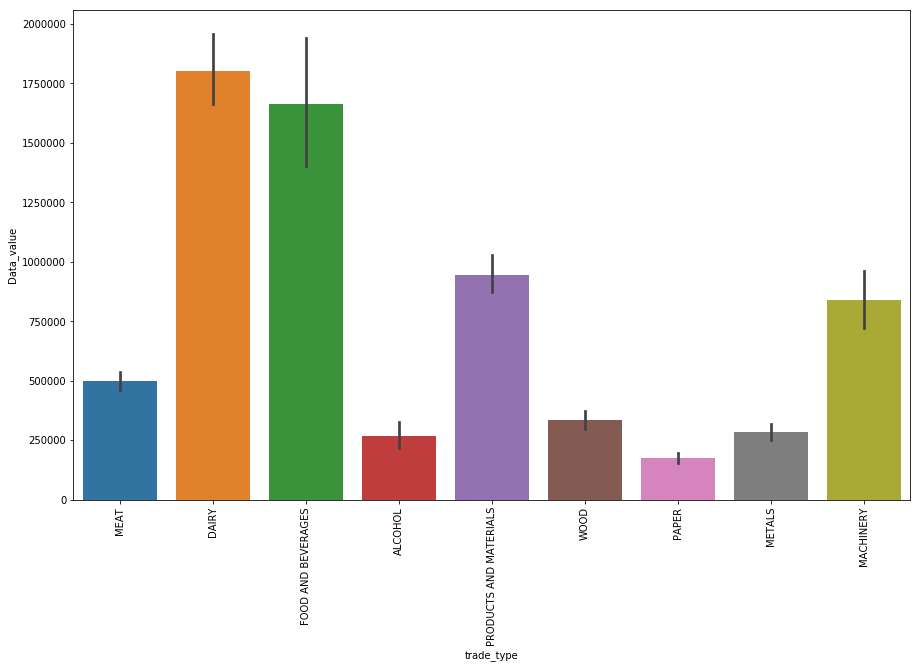

In [32]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.barplot(x='trade_type', y='Data_value', data=df_dollars)
plt.xticks(rotation=90)
plt.show()

In [33]:
df_dollars.Group.unique()

array(['Export volume indexes and values - analytical'], dtype=object)

In [34]:
df_dollars_import = df_overseas[(df_overseas['UNITS'] == "Dollars") & (df_overseas["Group"] == 'Import volume indexes and values - analytical')] # Get all Dollar Statements

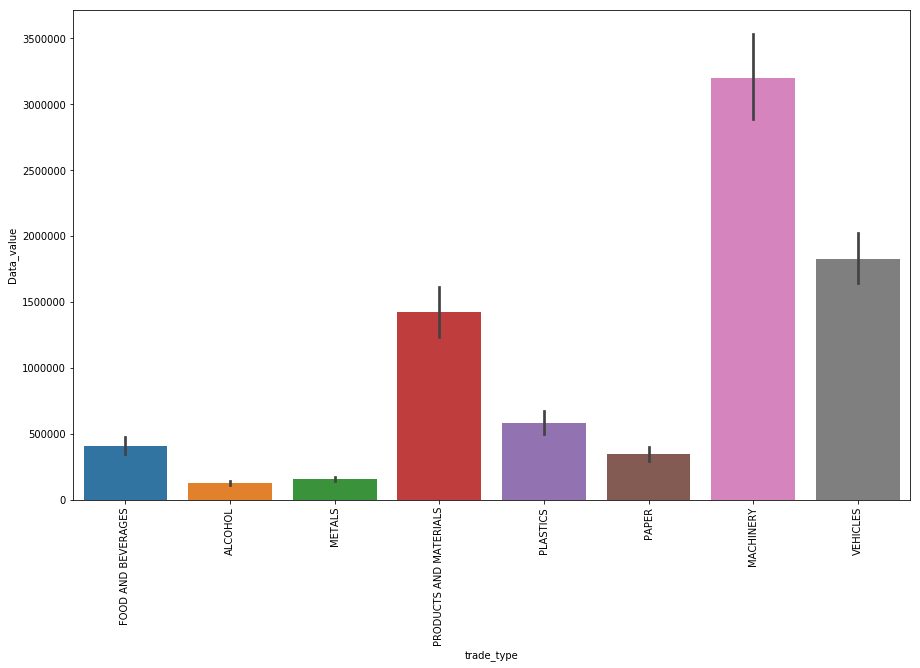

In [35]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.barplot(x='trade_type', y='Data_value', data=df_dollars_import)
plt.xticks(rotation=90)
plt.show()

In [66]:
exp_trade_type= df_dollars.groupby(['trade_type'])['Data_value'].sum()
df_exp_trade = pd.DataFrame(exp_trade_type)
df_exp_trade.reset_index(inplace=True)

In [67]:
df_exp_trade.head()

,trade_type,Data_value
0,ALCOHOL,3.963998e+07
1,DAIRY,2.668954e+09
2,FOOD AND BEVERAGES,1.232130e+09
3,MACHINERY,1.239498e+08
4,MEAT,4.426310e+08


In [68]:
tot = df_exp_trade.Data_value.sum()

In [69]:
df_exp_trade['percent'] = (df_exp_trade['Data_value'] / tot) * 100

In [38]:
#df_exp_trade.to_json('../DATA/export_trade_type.json', orient='table', index=False)

In [39]:
#df_exp_trade.to_csv('../DATA/export_trade_type.csv', index=False)

In [70]:
df_exp_trade = df_exp_trade.sort_values('percent', ascending=True)

In [72]:
df_exp_trade = df_exp_trade[-5:]

In [73]:
df_exp_trade

,trade_type,Data_value,percent
8,WOOD,1.404707e+08,2.167945
4,MEAT,4.426310e+08,6.831316
2,FOOD AND BEVERAGES,1.232130e+09,19.015992
7,PRODUCTS AND MATERIALS,1.711669e+09,26.416924
1,DAIRY,2.668954e+09,41.191121


In [74]:
df_exp_trade['percent'] = df_exp_trade['percent'].round(2)

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_exp_trade.drop(columns=['Data_value'], axis=1, inplace=True)

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [76]:
df_exp_trade.to_json("../JSON_DATA/export_trade_type_percent.json", orient='table')